In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [168]:
def genetic_drift_model(N,p, track_gens=False, printing=False):
    # generate parent generation
    if track_gens == True:
        type_tracker = []
    type_dict = {}
    for i in range(1, N + 1):
        type_dict[str(i)] = 0
    for _ in range(p):
        type = random.randint(1, N)
        type_str = str(type)
        type_dict[type_str] += 1

    #generate all future generations
    parent_gen = type_dict
    gens = 1
    while p not in parent_gen.values():
        new_gen = {}
        for i in range(1, N + 1):
            new_gen[str(i)] = 0
        for _ in range(p):
            rand_num = random.randint(1, p)
            x = 0
            for key, value in parent_gen.items():
                x += value
                if rand_num <= x:
                    new_gen[key] += 1
                    break
        parent_gen = new_gen
        gens += 1
        if track_gens == True:
            type_tracker.append(list(parent_gen.values()))

    if track_gens == True:
        type_arr = np.array(type_tracker)
        X = np.arange(1, gens)
        for q in range(np.shape(type_arr)[1]):
            y = type_arr[:, q]
            plt.plot(X, y)
    if printing == True:
        print("Number of generations until one type remains:", gens)
    return gens

Number of generations until one type remains: 1283


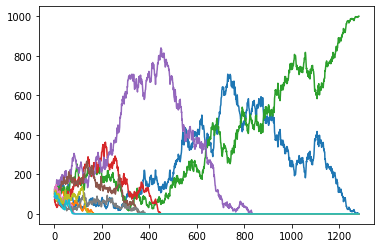

In [162]:
genetic_drift_model(10, 1000, True, True)

Number of generations until one type remains: 2536


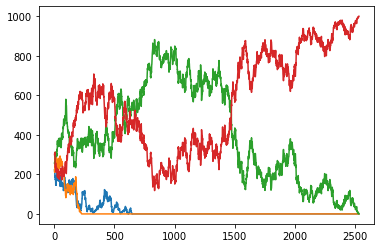

In [163]:
genetic_drift_model(4, 1000, True, True)

Number of generations until one type remains: 53


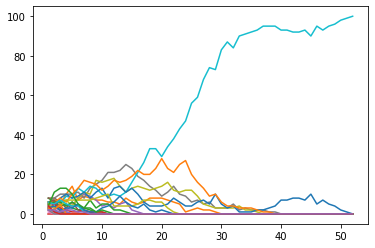

In [164]:
genetic_drift_model(25, 100, True, True)

Number of generations until one type remains: 176


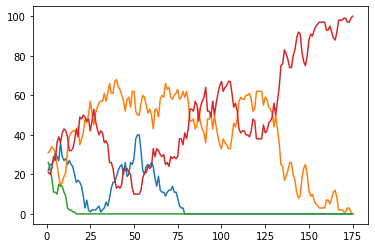

In [165]:
genetic_drift_model(4, 100, True, True)

In [169]:
def monte_carlo(N, p, trials):
    gen_lst = []
    for _ in range(trials):
        gens = genetic_drift_model(N, p)
        gen_lst.append(gens)
    gen_arr = np.array(gen_lst)
    mean = np.mean(gen_arr)
    std = np.std(gen_arr)

    plt.hist(gen_arr)

    print("Mean number of generations until convergence:", mean)
    print("Standard deviation of number of generations until convergence", std)

Mean number of generations until convergence: 91.8276
Standard deviation of number of generations until convergence 53.004043980058725


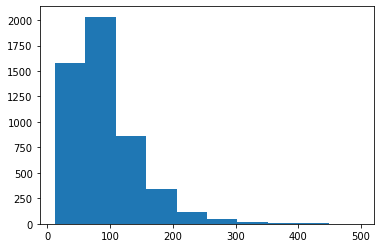

In [172]:
monte_carlo(10, 50, 5000)

Mean number of generations until convergence: 17.5476
Standard deviation of number of generations until convergence 10.129606815666637


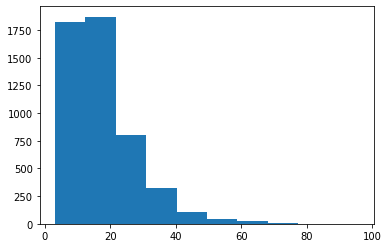

In [173]:
monte_carlo(10, 10, 5000)

Mean number of generations until convergence: 15.8958
Standard deviation of number of generations until convergence 9.932700657927832


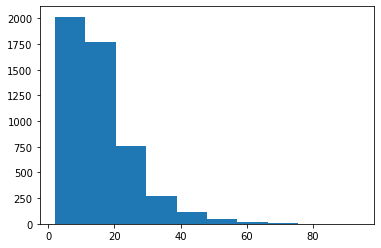

In [175]:
monte_carlo(4, 10, 5000)

Mean number of generations until convergence: 42.4012
Standard deviation of number of generations until convergence 25.43571187444928


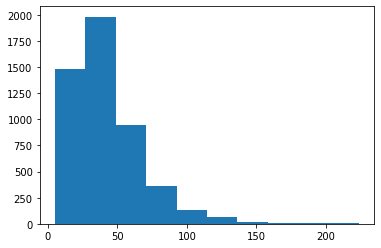

In [174]:
monte_carlo(5, 25, 5000)